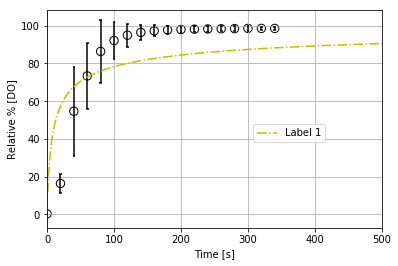

In [2]:
#!/usr/bin/python3.5
import numpy as np
import matplotlib.pyplot as plt


"""
Source:
 J.A. MUELLER, W. C. BOYLE and E.N. LIGHTFOOT,
 Effect of the response time of a dissolved oxygen probe
 on the oxygen uptake rate, Applied Microbiology, May 1967

"""

errorRate = lambda x: np.exp(-0.06*x)
x = np.linspace(0,100)
ze= np.zeros(len(x))

"""
#Display Error Curves
plt.plot(x,errorRate(x),"-")
plt.title("Theoric Precision Curves of O2 Probe")
plt.fill_between(x,errorRate(x),ze,alpha=0.3)
plt.grid(True)
plt.show()
"""

data = np.loadtxt("Eau-2.4LM.csv",skiprows=1,delimiter=",")

cellZoneData1 = np.loadtxt("frossling.csv",comments="#",delimiter=",")


T=data[:,1]
#For 2.4LM 4 is 150, 5 is 300 and 6 is 600
pO2=data[:,6]

dT = np.diff(T)
dC = np.diff(pO2)
#Error from time
error = np.add.accumulate(errorRate(dT))*np.abs(dC)
#Add the 0 value for the first entry and
#the precision error
error=np.insert(error,0,0)+0.01*pO2

maxErrorPos=error+pO2
minErrorPos=-1*error+pO2

#Display graph
plt.vlines(T,maxErrorPos,minErrorPos)
plt.hlines(maxErrorPos,T-2,T+2)
plt.hlines(minErrorPos,T-2,T+2)
plt.scatter(T,pO2,s=70,facecolor="none",edgecolors="black")
plt.plot(cellZoneData1[:,0],cellZoneData1[:,2],'y-.',label='Label 1')
plt.xlabel("Time [s]")
plt.ylabel("Relative % [DO]")
plt.xlim([0,500])
plt.grid(True)
plt.legend(loc=2,bbox_to_anchor=(0.6,0.5))
plt.savefig("DO600.eps", format="eps")
plt.show()
